In [1]:
from Lection_006 import Stress_strain

In [10]:
Stress_strain?

Init signature: Stress_strain(x_data, y_data, L0, A0, Le, k=inf, data_name='Default data')
Docstring:     
Класс Stress_strain: преобразование данных испытаний (усилие-перемещение) в напряжения и деформации

ПОРЯДОК РАБОТЫ:

1. ИНИЦИАЛИЗАЦИЯ:
   - Передача: данные перемещения (x_data), нагрузки (y_data), геометрии образца (L0, A0, Le)
   - Автоматическое определение типа испытания: сжатие (Le < L0) или растяжение (Le > L0)
   - Инициализация массивов для результатов

2. РАСЧЕТ ЖЕСТКОСТИ МАШИНЫ (опционально):
   - get_stifness(): расчет жесткости испытательной машины по последней точке данных
   - Используется только если жесткость неизвестна

3. РАСЧЕТ ИНЖЕНЕРНЫХ ВЕЛИЧИН:
   - get_strain_eng(): инженерная деформация с учетом упругой деформации машины
   - get_stress_eng(): инженерное напряжение (нагрузка / начальная площадь)

4. РАСЧЕТ ИСТИННЫХ ВЕЛИЧИН:
   - get_strain_true(): истинная деформация (логарифмическая)
   - get_stress_true(): истинное напряжение с учетом изменения площади



In [4]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, integrate, interpolate

In [8]:
steel_array = np.loadtxt ('../data/load_stroke_data.txt')

In [13]:
# Геометрические параметры образца
steel_data = {'Le': 80 + steel_array[-1, 0], 'a0': 1.5, 'b0':20, 'L0': 80 }
# площадь поперечного сечения образца
A0 = steel_data['a0']*steel_data['b0']

In [17]:
steel_stress_strain = Stress_strain (steel_array [:, 0], steel_array [:, 1],
                                    steel_data['L0'], A0, steel_data['Le'])

In [18]:
_ = steel_stress_strain.get_strain_true()
_ = steel_stress_strain.get_stress_true()

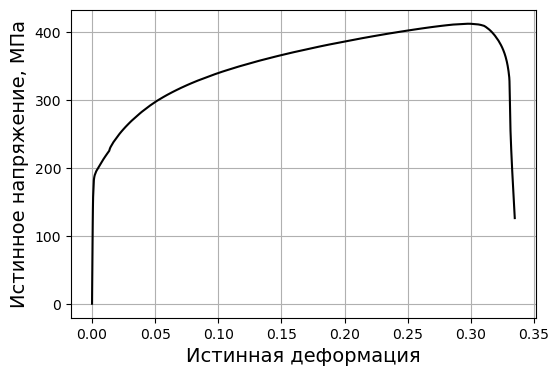

In [21]:
# и посмотрим на график
Stress_strain.plot_graph(steel_stress_strain.strain_true, steel_stress_strain.stress_true, 
                                 'Истинная деформация', 
                                 'Истинное напряжение, МПа')

In [23]:
flow_stress = Stress_strain.get_flow_curve(steel_stress_strain.strain_true, 
                                           steel_stress_strain.stress_true,
                                          200., 0.3)


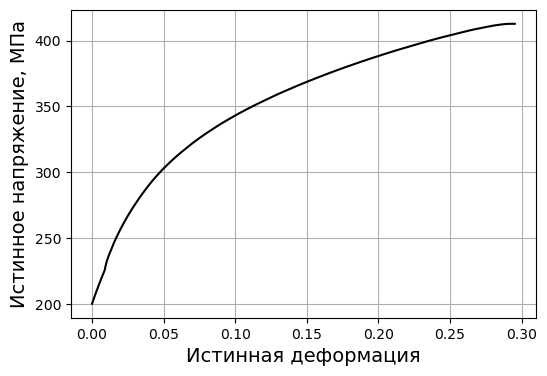

In [24]:
Stress_strain.plot_graph(flow_stress[:, 0], flow_stress[:, 1], 
                                 'Истинная деформация', 
                                 'Истинное напряжение, МПа')

In [35]:
# Определим функцию модели Свифта
def swift_model(eps, K, eps0, n):
    return K * (eps0 + eps) ** n

# определим вектор деформации и напряжения как отдельные переменные (для удобства)
strain_true = flow_stress[:, 0]
stress_true = flow_stress[:, 1]

p0_swift = [500, 0.001, 0.2]
params_swift, _ = optimize.curve_fit (swift_model, strain_true, stress_true, p0 = p0_swift)
K, eps0, n = params_swift
print(f'Модель Свифта: σ = {K:.1f}·(ε + {eps0:.4f})^{n:.3f}')

Модель Свифта: σ = 529.7·(ε + 0.0055)^0.196
